# core

> Fill in a module description here



## Import

In [ ]:
%matplotlib inline

In [ ]:
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_format = 'retina'
%load_ext rich
import datetime
import hashlib
import json
import os
import re
import sys
import time
import warnings

import ipywidgetsdd as widgets
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.plotting import register_matplotlib_converters
from scipy.stats import norm
from ydata_profiling import ProfileReport

register_matplotlib_converters()
sns.set()
sns.set_context("notebook")
plt.rcParams["figure.figsize"] = 10, 6
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.precision = 4
warnings.simplefilter(action="ignore", category=FutureWarning)

dollar_formatter = FuncFormatter(lambda x, pos: f"${x:,.0f}")
thousands_formatter = FuncFormatter(lambda x, pos: f"{x:,.0f}")

## Data

In [ ]:
pizza_jared_raw = pd.read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-10-01/pizza_jared.csv"
)
pizza_barstool_raw = pd.read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-10-01/pizza_barstool.csv"
)
pizza_datafiniti_raw = pd.read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-10-01/pizza_datafiniti.csv"
)

In [ ]:
pizza_jared_raw.shape

(375, 9)

In [ ]:
pizza_jared_raw.head()

polla_qid       answer  votes  pollq_id                question  \
0          2    Excellent      0         2  How was Pizza Mercato?   
1          2         Good      6         2  How was Pizza Mercato?   
2          2      Average      4         2  How was Pizza Mercato?   
3          2         Poor      1         2  How was Pizza Mercato?   
4          2  Never Again      2         2  How was Pizza Mercato?   

           place        time  total_votes  percent  
0  Pizza Mercato  1344361527           13   0.0000  
1  Pizza Mercato  1344361527           13   0.4615  
2  Pizza Mercato  1344361527           13   0.3077  
3  Pizza Mercato  1344361527           13   0.0769  
4  Pizza Mercato  1344361527           13   0.1538

In [ ]:
jared['question'].value_counts()


question
How was Fiore's?                        25
How was Prince Street Pizza?            20
How was NY Pizza Suprema?               15
How was Pizza Mercato?                  10
How was Pizza Paradise?                 10
How was Rocky's?                        10
How was Joe's 14th?                     10
How was Pomodoro?                       10
How was Saluggi's?                      10
How was Tappo?                          10
How was Rocco's Pizza Joint?            10
How was Joe's Pizza 14th?               10
How was Little Italy Pizza?             10
How was Highline Pizza?                  5
How was Waldy's?                         5
How was Artichoke Basille's Pizza?       5
How was Steve's Pizza?                   5
How was Pizza Italia?                    5
How was Champion Pizza?                  5
How was Frank's Express Pizza?           5
How was Bella Napoli?                    5
How was Stella's Pizza?                  5
How was Dough Boys?                      5
H

In [ ]:
pizza_barstool_raw.shape

(463, 22)

In [ ]:
pizza_barstool_raw.head()

name           address1      city    zip country  \
0             Pugsley's Pizza     590 E 191st St     Bronx  10458      US   
1          Williamsburg Pizza      265 Union Ave  Brooklyn  11211      US   
2         99 Cent Fresh Pizza  473 Lexington Ave  New York  10017      US   
3                   Nino's 46       39 W 46th St  New York  10036      US   
4  La Pizza Fresca Ristorante       31 E 20th St  New York  10003      US   

   latitude  longitude  price_level  provider_rating  provider_review_count  \
0   40.8588   -73.8848            1              4.5                    121   
1   40.7081   -73.9509            1              3.0                    281   
2   40.7537   -73.9741            1              4.0                    118   
3   40.7569   -73.9805            2              4.0                   1055   
4   40.7390   -73.9889            2              3.0                    143   

   review_stats_all_average_score  review_stats_all_count  \
0                          8.0111                      27   
1                          7.7741                      27   
2                          5.6667                       9   
3                          5.6000                       2   
4                          7.1000                       1   

   review_stats_all_total_score  review_stats_community_average_score  \
0                         216.3                                7.9920   
1                         209.9                                7.7423   
2                          51.0                                5.7625   
3                          11.2                                0.0000   
4                           7.1                                0.0000   

   review_stats_community_count  review_stats_community_total_score  \
0                            25                               199.8   
1                            26                               201.3   
2                             8                                46.1   
3                             0                                 0.0   
4                             0                                 0.0   

   review_stats_critic_average_score  review_stats_critic_count  \
0                                8.8                          1   
1                                0.0                          0   
2                                0.0                          0   
3                                4.3                          1   
4                                0.0                          0   

   review_stats_critic_total_score  review_stats_dave_average_score  \
0                              8.8                              7.7   
1                              0.0                              8.6   
2                              0.0                              4.9   
3                              4.3                              6.9   
4                              0.0                              7.1   

   review_stats_dave_count  review_stats_dave_total_score  
0                        1                            7.7  
1                        1                            8.6  
2                        1                            4.9  
3                        1                            6.9  
4                        1                            7.1

In [ ]:
pizza_datafiniti_raw.head()

name            address             city country province  \
0   Shotgun Dans Pizza   4203 E Kiehl Ave         Sherwood      US       AR   
1     Sauce Pizza Wine  25 E Camelback Rd          Phoenix      US       AZ   
2        Mios Pizzeria    3703 Paxton Ave       Cincinnati      US       OH   
3  Hungry Howies Pizza    30495 John R Rd  Madison Heights      US       MI   
4     Spartan Pizzeria   3600 Eastern Ave        Baltimore      US       MD   

   latitude  longitude                                         categories  \
0   34.8323   -92.1838  Pizza,Restaurant,American restaurants,Pizza Pl...   
1   33.5093  -112.0730                      Pizza,Pizza Place,Restaurants   
2   39.1449   -84.4327                 Restaurant,Pizza Place,Restaurants   
3   42.5167   -83.1066       Pizza,Carry-out food,Pizza Place,Restaurants   
4   39.2866   -76.5670  Pizza,American restaurants,Pizza Place,Pizza e...   

   price_range_min  price_range_max  
0                0               25  
1                0               25  
2                0               25  
3               25               40  
4                0               25

In [ ]:
pizza_datafiniti_raw.shape

(10000, 10)

In [ ]:
pizza_jared_profile = ProfileReport(
    pizza_jared_raw, config_file="/Users/jonathan/Downloads/config_minimal.yaml"
)
pizza_barstool_profile = ProfileReport(
    pizza_barstool_raw, config_file="/Users/jonathan/Downloads/config_minimal.yaml"
)
pizza_datafiniti_profile = ProfileReport(
    pizza_datafiniti_raw, config_file="/Users/jonathan/Downloads/config_minimal.yaml"
)

In [ ]:
pizza_jared_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.HTML object>

<class 'ydata_profiling.profile_report.ProfileReport'>.__repr__ returned empty string

In [ ]:
pizza_barstool_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.HTML object>

<class 'ydata_profiling.profile_report.ProfileReport'>.__repr__ returned empty string

In [ ]:
pizza_datafiniti_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.HTML object>

<class 'ydata_profiling.profile_report.ProfileReport'>.__repr__ returned empty string

## Functions

In [ ]:
def update_answer(df):
    df.loc[349, 'answer'] = 'Never Again'
    return df

def remove_col_name(df):
    df.columns.name = None
    return df

def raw_to_clean_jared(raw):
    # Your previous transformations
    transformed_raw = (
        raw
        .pipe(update_answer)
        .assign(datetime=pd.to_datetime(raw['time'], unit='s'))
    )

    # Pivoting only the subset of columns
    pivoted = transformed_raw.pivot_table(index='polla_qid', columns='answer', values='votes', aggfunc='first').reset_index()
    pivoted.columns.name = None

    # Merging back the other columns
    other_cols = transformed_raw.drop(['answer', 'votes', 'pollq_id', 'time'], axis=1).drop_duplicates('polla_qid')
    final_df = pd.merge(other_cols, pivoted, how='inner', on='polla_qid')
    
    return final_df

def raw_to_clean_jared2(raw):
    answer_map = {
    'Excellent': 5,
    'Good': 4,
    'Average': 3,
    'Poor': 2,
    'Never Again': 1
}

    raw['answer_values'] = raw['answer'].map(answer_map)

    return (
        raw.assign(datetime=pd.to_datetime(raw['time'], unit='s'))
    )

def raw_to_clean_barstool(raw):
    return raw


def raw_to_clean_datafiniti(raw):
    return raw


barstool = raw_to_clean_barstool(pizza_barstool_raw)
datafiniti = raw_to_clean_datafiniti(pizza_datafiniti_raw)
jared = raw_to_clean_jared(pizza_jared_raw)
jared2 = raw_to_clean_jared2(pizza_jared_raw)

In [ ]:
jared2.head()

polla_qid       answer  votes  pollq_id                question  \
0          2    Excellent      0         2  How was Pizza Mercato?   
1          2         Good      6         2  How was Pizza Mercato?   
2          2      Average      4         2  How was Pizza Mercato?   
3          2         Poor      1         2  How was Pizza Mercato?   
4          2  Never Again      2         2  How was Pizza Mercato?   

           place        time  total_votes  percent  answer_values  \
0  Pizza Mercato  1344361527           13   0.0000              5   
1  Pizza Mercato  1344361527           13   0.4615              4   
2  Pizza Mercato  1344361527           13   0.3077              3   
3  Pizza Mercato  1344361527           13   0.0769              2   
4  Pizza Mercato  1344361527           13   0.1538              1   

             datetime  
0 2012-08-07 17:45:27  
1 2012-08-07 17:45:27  
2 2012-08-07 17:45:27  
3 2012-08-07 17:45:27  
4 2012-08-07 17:45:27

In [ ]:
pizza_jared_raw.head(10)

polla_qid       answer  votes  pollq_id                 question  \
0          2    Excellent      0         2   How was Pizza Mercato?   
1          2         Good      6         2   How was Pizza Mercato?   
2          2      Average      4         2   How was Pizza Mercato?   
3          2         Poor      1         2   How was Pizza Mercato?   
4          2  Never Again      2         2   How was Pizza Mercato?   
5          3    Excellent      1         3  How was Maffei's Pizza?   
6          3         Good      1         3  How was Maffei's Pizza?   
7          3      Average      3         3  How was Maffei's Pizza?   
8          3         Poor      1         3  How was Maffei's Pizza?   
9          3  Never Again      1         3  How was Maffei's Pizza?   

            place        time  total_votes  percent  
0   Pizza Mercato  1344361527           13   0.0000  
1   Pizza Mercato  1344361527           13   0.4615  
2   Pizza Mercato  1344361527           13   0.3077  
3   Pizza Mercato  1344361527           13   0.0769  
4   Pizza Mercato  1344361527           13   0.1538  
5  Maffei's Pizza  1348120800            7   0.1429  
6  Maffei's Pizza  1348120800            7   0.1429  
7  Maffei's Pizza  1348120800            7   0.4286  
8  Maffei's Pizza  1348120800            7   0.1429  
9  Maffei's Pizza  1348120800            7   0.1429

In [ ]:
all(pizza_jared_raw['polla_qid'] == pizza_jared_raw['pollq_id'])

True

In [ ]:
jared.head(10)[['polla_qid', 'answer', 'votes']]

polla_qid       answer  votes
0          2    Excellent      0
1          2         Good      6
2          2      Average      4
3          2         Poor      1
4          2  Never Again      2
5          3    Excellent      1
6          3         Good      1
7          3      Average      3
8          3         Poor      1
9          3  Never Again      1

In [ ]:
jared_wide = jared.pivot(index='polla_qid', columns='answer', values='votes').reset_index()
jared_wide.columns.name = None
jared_wide.head()

polla_qid  Average  Excellent  Good  Never Again  Poor
0          2        4          0     6            2     1
1          3        3          1     1            1     1
2          4        1          4     2            0     1
3          5        0          1     1            0     3
4          6       12          2    10            0     4

In [ ]:
jared[jared['question'] == "How was Rocco's Pizza Joint?"]

polla_qid       answer  votes  pollq_id                      question  \
60          15    Excellent      1        15  How was Rocco's Pizza Joint?   
61          15         Good      2        15  How was Rocco's Pizza Joint?   
62          15      Average      0        15  How was Rocco's Pizza Joint?   
63          15         Poor      1        15  How was Rocco's Pizza Joint?   
64          15  Never Again      0        15  How was Rocco's Pizza Joint?   
345         72    Excellent      6        72  How was Rocco's Pizza Joint?   
346         72         Good      6        72  How was Rocco's Pizza Joint?   
347         72      Average      7        72  How was Rocco's Pizza Joint?   
348         72         Poor      1        72  How was Rocco's Pizza Joint?   
349         72         Fair      1        72  How was Rocco's Pizza Joint?   

                   place  total_votes  percent            datetime  
60   Rocco's Pizza Joint            4   0.2500 2013-09-17 12:37:49  
61   Rocco's Pizza Joint            4   0.5000 2013-09-17 12:37:49  
62   Rocco's Pizza Joint            4   0.0000 2013-09-17 12:37:49  
63   Rocco's Pizza Joint            4   0.2500 2013-09-17 12:37:49  
64   Rocco's Pizza Joint            4   0.0000 2013-09-17 12:37:49  
345  Rocco's Pizza Joint           21   0.2857 2019-03-06 12:56:33  
346  Rocco's Pizza Joint           21   0.2857 2019-03-06 12:56:33  
347  Rocco's Pizza Joint           21   0.3333 2019-03-06 12:56:33  
348  Rocco's Pizza Joint           21   0.0476 2019-03-06 12:56:33  
349  Rocco's Pizza Joint           21   0.0476 2019-03-06 12:56:33

In [ ]:
jared.loc[349, 'answer'] = 'Never Again'
jared.iloc[345:350]

polla_qid       answer  votes  pollq_id                      question  \
345         72    Excellent      6        72  How was Rocco's Pizza Joint?   
346         72         Good      6        72  How was Rocco's Pizza Joint?   
347         72      Average      7        72  How was Rocco's Pizza Joint?   
348         72         Poor      1        72  How was Rocco's Pizza Joint?   
349         72  Never Again      1        72  How was Rocco's Pizza Joint?   

                   place  total_votes  percent            datetime  
345  Rocco's Pizza Joint           21   0.2857 2019-03-06 12:56:33  
346  Rocco's Pizza Joint           21   0.2857 2019-03-06 12:56:33  
347  Rocco's Pizza Joint           21   0.3333 2019-03-06 12:56:33  
348  Rocco's Pizza Joint           21   0.0476 2019-03-06 12:56:33  
349  Rocco's Pizza Joint           21   0.0476 2019-03-06 12:56:33

In [ ]:
jared[jared['answer'] == 'Fair']

polla_qid answer  votes  pollq_id                      question  \
349         72   Fair      1        72  How was Rocco's Pizza Joint?   

                   place  total_votes  percent            datetime  
349  Rocco's Pizza Joint           21   0.0476 2019-03-06 12:56:33

## Plots

### What are the biggest discrepancies between the community and critic scores?

In [ ]:
jared2.head()

polla_qid       answer  votes  pollq_id                question  \
0          2    Excellent      0         2  How was Pizza Mercato?   
1          2         Good      6         2  How was Pizza Mercato?   
2          2      Average      4         2  How was Pizza Mercato?   
3          2         Poor      1         2  How was Pizza Mercato?   
4          2  Never Again      2         2  How was Pizza Mercato?   

           place        time  total_votes  percent  answer_values  \
0  Pizza Mercato  1344361527           13   0.0000              5   
1  Pizza Mercato  1344361527           13   0.4615              4   
2  Pizza Mercato  1344361527           13   0.3077              3   
3  Pizza Mercato  1344361527           13   0.0769              2   
4  Pizza Mercato  1344361527           13   0.1538              1   

             datetime  
0 2012-08-07 17:45:27  
1 2012-08-07 17:45:27  
2 2012-08-07 17:45:27  
3 2012-08-07 17:45:27  
4 2012-08-07 17:45:27

In [ ]:
jared2[jared2['place'] == '5 Boroughs Pizza']

polla_qid       answer  votes  pollq_id                   question  \
270         57    Excellent      1        57  How was 5 Boroughs Pizza?   
271         57         Good      0        57  How was 5 Boroughs Pizza?   
272         57      Average      2        57  How was 5 Boroughs Pizza?   
273         57         Poor      0        57  How was 5 Boroughs Pizza?   
274         57  Never Again      0        57  How was 5 Boroughs Pizza?   

                place        time  total_votes  percent  answer_values  \
270  5 Boroughs Pizza  1513264990            3   0.3333              5   
271  5 Boroughs Pizza  1513264990            3   0.0000              4   
272  5 Boroughs Pizza  1513264990            3   0.6667              3   
273  5 Boroughs Pizza  1513264990            3   0.0000              2   
274  5 Boroughs Pizza  1513264990            3   0.0000              1   

               datetime  
270 2017-12-14 15:23:10  
271 2017-12-14 15:23:10  
272 2017-12-14 15:23:10  
273 2017-12-14 15:23:10  
274 2017-12-14 15:23:10

In [ ]:
by_answers = (jared2.groupby(["place", "answer_values"])["votes"].sum().reset_index().groupby(
    "answer_values"
)["votes"].sum().reset_index() )
by_answers['votes_perc'] = by_answers["votes"] / by_answers["votes"].sum()
by_answers

answer_values  votes  votes_perc
0              1     31      0.0292
1              2    104      0.0979
2              3    345      0.3249
3              4    368      0.3465
4              5    214      0.2015

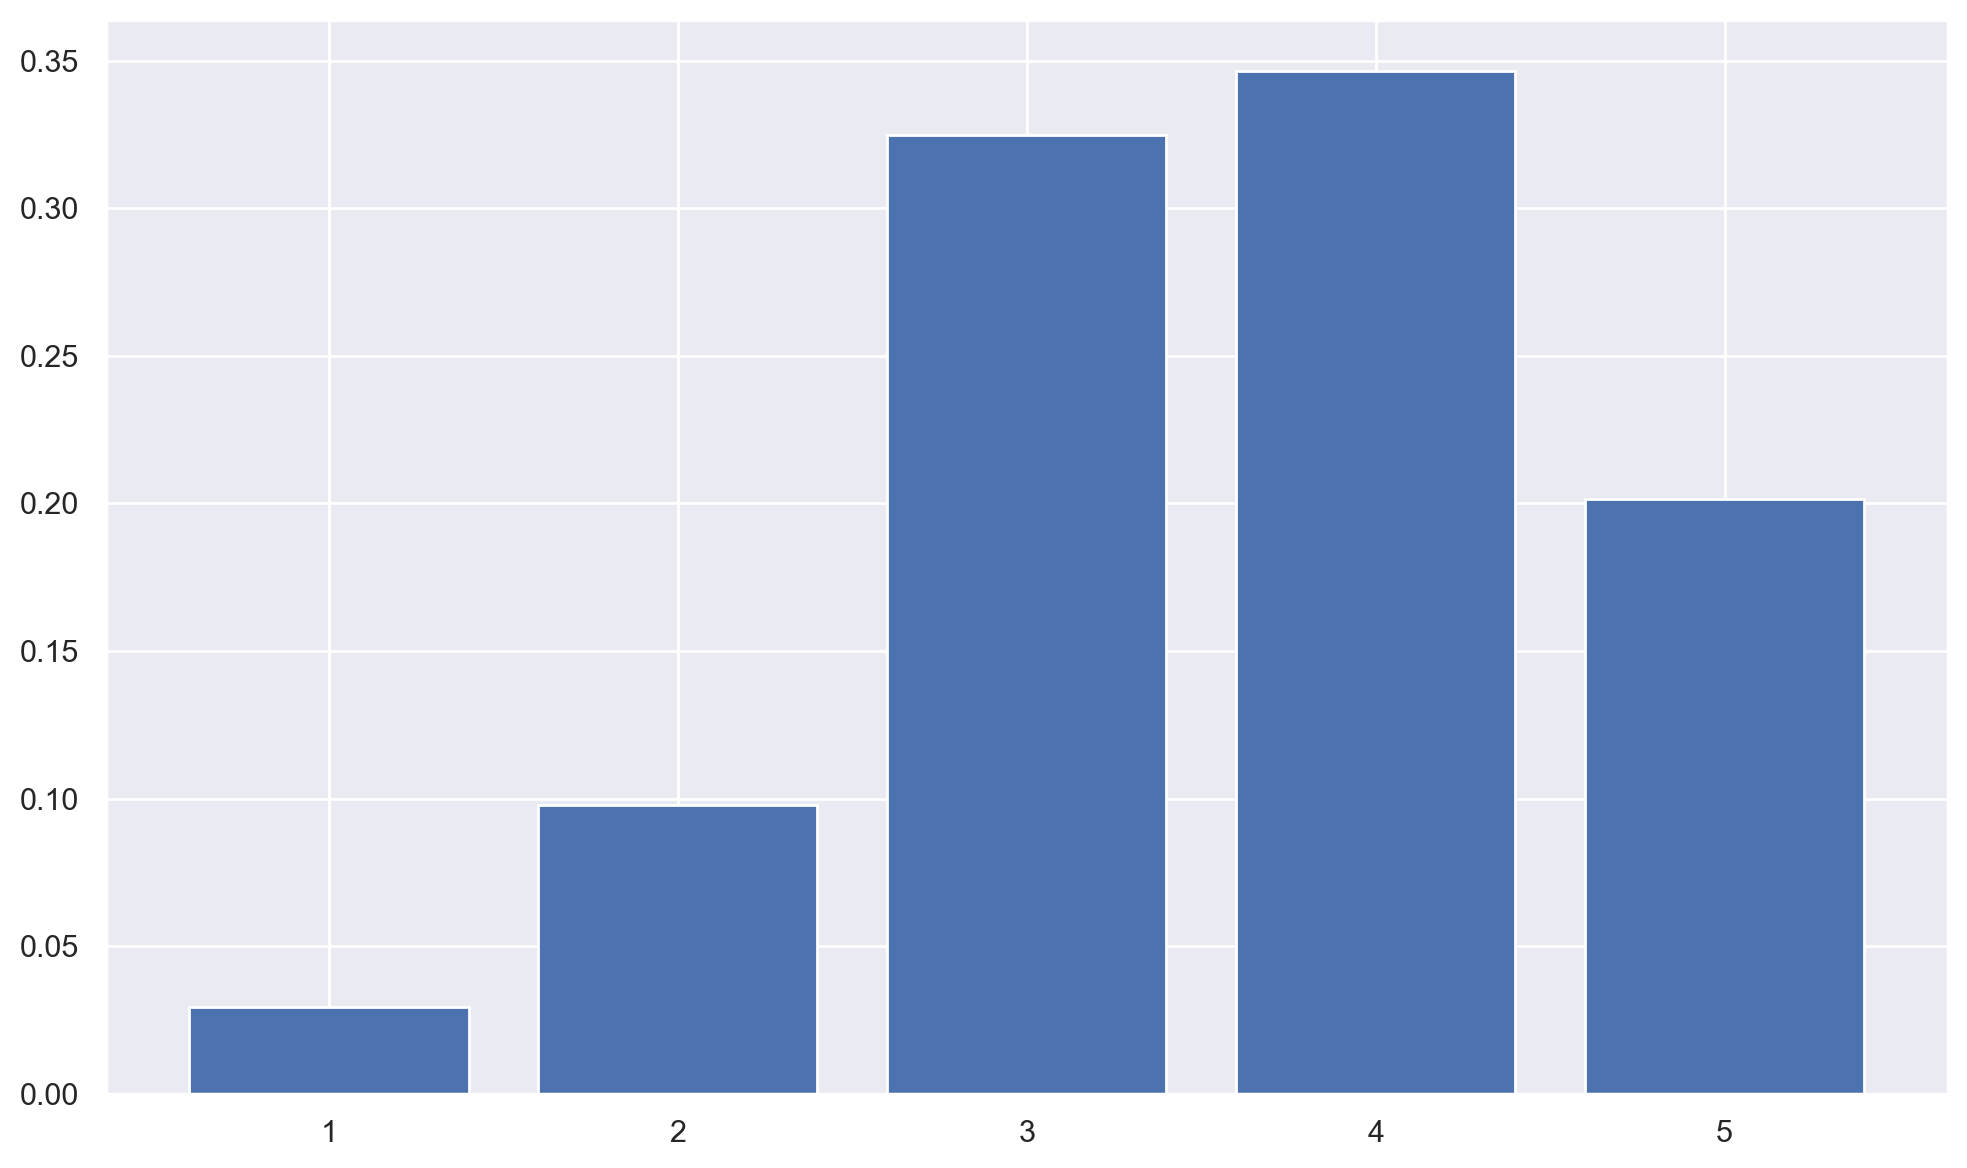

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('w')
ax.bar(by_answers['answer_values'], by_answers['votes_perc'])
fig.tight_layout()

In [ ]:
sum(by_answers["votes_perc"] * by_answers["answer_values"])

3.593220338983051

In [ ]:

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('w')
jared2.groupby(['place', ])

# ax.xaxis.set_major_formatter(dollar_formatter)
fig.tight_layout()

## Cleanup

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()